In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Name of the CSV file



# Combine the data into a single dataset
df_combined = pd.merge(ride_data,city_data,how="left",on="city")
# Display the data table for preview
df_combined.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

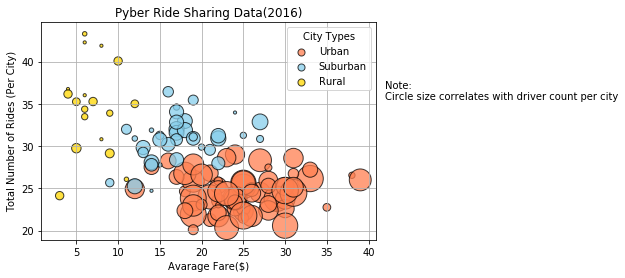

In [2]:
# Obtain the x and y coordinates for each of the three city types
urben_df = df_combined[df_combined['type'] =="Urban"].groupby('city').mean()['fare']
urben_ride =  df_combined[df_combined['type'] =="Urban"].groupby('city').count()['ride_id']
urban_size = df_combined[df_combined['type'] =="Urban"].groupby('city').mean()['driver_count']

sub_df = df_combined[df_combined['type'] =="Suburban"].groupby('city').mean()['fare']
sub_ride =  df_combined[df_combined['type'] =="Suburban"].groupby('city').count()['ride_id']
sub_size = df_combined[df_combined['type'] =="Suburban"].groupby('city').mean()['driver_count']

rural_df = df_combined[df_combined['type'] =="Rural"].groupby('city').mean()['fare']
rural_ride =  df_combined[df_combined['type'] =="Rural"].groupby('city').count()['ride_id']
rural_size = df_combined[df_combined['type'] =="Rural"].groupby('city').mean()['driver_count']


# Build the' scatter plots for each city types
plt.scatter(urben_ride,urben_df,s=urban_size*10,facecolor = "coral",label = "Urban",edgecolor = 'black',alpha = 0.75)
plt.scatter(sub_ride,sub_df,s=sub_size*10,facecolor = "skyblue",label = "Suburban",edgecolor = 'black',alpha = 0.75)
plt.scatter(rural_ride,rural_df,s=rural_size*10,facecolor = "gold",label = "Rural",edgecolor = 'black',alpha = 0.75)
plt.grid()

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Avarage Fare($)")
plt.ylabel("Total Number of Rides (Per City)")

    
# Create a legend
lgnd = plt.legend(loc = "upper right",title = "City Types")
lgnd.legendHandles[0]._sizes=[50]
lgnd.legendHandles[1]._sizes=[50]
lgnd.legendHandles[2]._sizes=[50]

# Incorporate a text label regarding circle size
plt.text(42,35.5,"Note:\nCircle size correlates with driver count per city")

# Save Figure
plt.savefig("pyeber ride.png")
 
# Show plot
plt.show()




## Total Fares by City Type

Text(0.5, 1.0, '% of Total Fares by City Type')

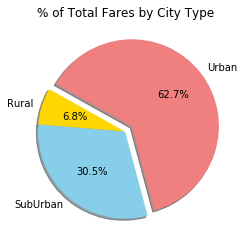

In [3]:
# Calculate Type Percents
urben_pie = df_combined[df_combined['type'] =="Urban"].sum()['fare']
sub_pie = df_combined[df_combined['type'] =="Suburban"].sum()['fare']
rural_pie = df_combined[df_combined['type'] =="Rural"].sum()['fare']

pie_list = [urben_pie,rural_pie,sub_pie,]
pie_name = ["Urban","Rural","SubUrban"]
colors = ["lightcoral","gold","skyblue"]
explode = (0.1,0,0)


# Build Pie Chart
plt.pie(pie_list, explode=explode, labels=pie_name, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=285)

plt.title("% of Total Fares by City Type")
plt.title("% of Total Fares by City Type")


## Total Rides by City Type

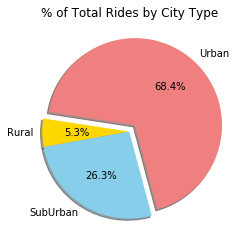

In [4]:
# Calculate Ride Percents
urben_pie = df_combined[df_combined['type'] =="Urban"].count()['ride_id']
sub_pie = df_combined[df_combined['type'] =="Suburban"].count()['ride_id']
rural_pie = df_combined[df_combined['type'] =="Rural"].count()['ride_id']

pie_list = [urben_pie,rural_pie,sub_pie,]
pie_name = ["Urban","Rural","SubUrban"]
colors = ["lightcoral","gold","skyblue"]
explode = (0.1,0,0)



# Build Pie Chart
plt.pie(pie_list, explode=explode, labels=pie_name, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=285)

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("pyeber ride.png")

# Show Figure
plt.show()

## Total Drivers by City Type

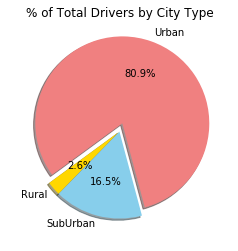

In [5]:
# Calculate Ride Percents
urben_pie = city_data[city_data['type']=="Urban"].sum()['driver_count']
sub_pie = city_data[city_data['type'] =="Suburban"].sum()['driver_count']
rural_pie = city_data[city_data['type'] =="Rural"].sum()['driver_count']

pie_list = [urben_pie,rural_pie,sub_pie,]
pie_name = ["Urban","Rural","SubUrban"]
colors = ["lightcoral","gold","skyblue"]
explode = (0.1,0,0)



# Build Pie Chart
plt.pie(pie_list, explode=explode, labels=pie_name, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=285)

#plt.title
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("pyeber driver.png")
# Show Figure
plt.show()